In [1]:
%matplotlib notebook

import tullerutils as tu

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from IPython.display import display, clear_output
from ipywidgets import *

import os

In [2]:
##### IMPORT DATA HERE #####
#root = r"C:\Users\jade2\Dropbox (Personal)\Obsidian Vault\Topics\MetalOxides\Analyses\PCO5_8k_2\po2steps"
#root = r"C:\Users\jade2\Dropbox (Personal)\Obsidian Vault\Topics\MetalOxides\Analyses\PCO5_8k_2\spectra"

#root = r"C:\Users\jade2\Dropbox (Personal)\Obsidian Vault\Topics\MetalOxides\Analyses\PCO5_8k_2clean\po2steps"
#root = r"C:\Users\jade2\Dropbox (Personal)\Obsidian Vault\Topics\MetalOxides\Analyses\PCO5_8k_2clean\spectra"

#root = r"C:\Users\jade2\Dropbox (Personal)\Obsidian Vault\Topics\MetalOxides\Analyses\PCO10_columnar1\po2steps"
#root = r"C:\Users\jade2\Dropbox (Personal)\Obsidian Vault\Topics\MetalOxides\Analyses\PCO10_columnar1\spectra"
root = r"C:\Users\jade2\Dropbox (Personal)\Obsidian Vault\Topics\MetalOxides\Analyses\PCO10_columnar1_HanGil\po2steps"
#root = r"C:\Users\jade2\Dropbox (Personal)\Obsidian Vault\Topics\MetalOxides\Analyses\PCO10_columnar1_HanGil\spectra"

#root = r"C:\Users\jade2\Dropbox (Personal)\Obsidian Vault\Topics\MetalOxides\Analyses\PCO10_columnar2\po2steps"
#root = r"C:\Users\jade2\Dropbox (Personal)\Obsidian Vault\Topics\MetalOxides\Analyses\PCO10_columnar2\spectra"

#root = r"C:\Users\jade2\Dropbox (Personal)\Obsidian Vault\Topics\MetalOxides\Analyses\PCO5_8k_2_cleanvdirty"

header = 3 # number of lines to skip


filenames = os.listdir(root) # ensure root only has csv files
filepaths = [os.path.join(root, fname) for fname in filenames]
dataframes = [pd.read_csv(path, skiprows=header) for path in filepaths]

print(dataframes[0].keys())

Index(['Time (s)', ' Frequency (Hz)', ' | Z | (Ohm)'], dtype='object')


['350C_0.1-0.2-0.1_200Hz_dark.csv', '350C_0.1-0.2-0.1_200Hz_light.csv', '350C_0.1_200Hz_dark-light.csv', '400C_0.1-0.2_200Hz_dark.csv', '400C_0.1-0.2_200Hz_light.csv', '400C_0.1_200Hz_dark-light.csv', '400C_0.1_200Hz_light-dark.csv', '400C_0.2-0.1_200Hz_dark.csv', '400C_0.2-0.1_200Hz_light.csv', '425C_0.1-0.2_200Hz_dark.csv', '425C_0.1-0.2_200Hz_light.csv', '425C_0.1_200Hz_dark-light.csv', '425C_0.1_200Hz_light-dark.csv', '425C_0.2-0.1_200Hz_dark.csv', '425C_0.2-0.1_200Hz_light.csv', '475C_0.1-0.2_200Hz_light.csv', '475C_0.1to0.2_200Hz_dark.csv', '475C_0.1_200Hz_dark-light.csv', '475C_0.1_200Hz_light-dark.csv', '475C_0.2-0.1_200Hz_light.csv', '475C_0.2to0.1_200Hz_dark.csv']


<IPython.core.display.Javascript object>


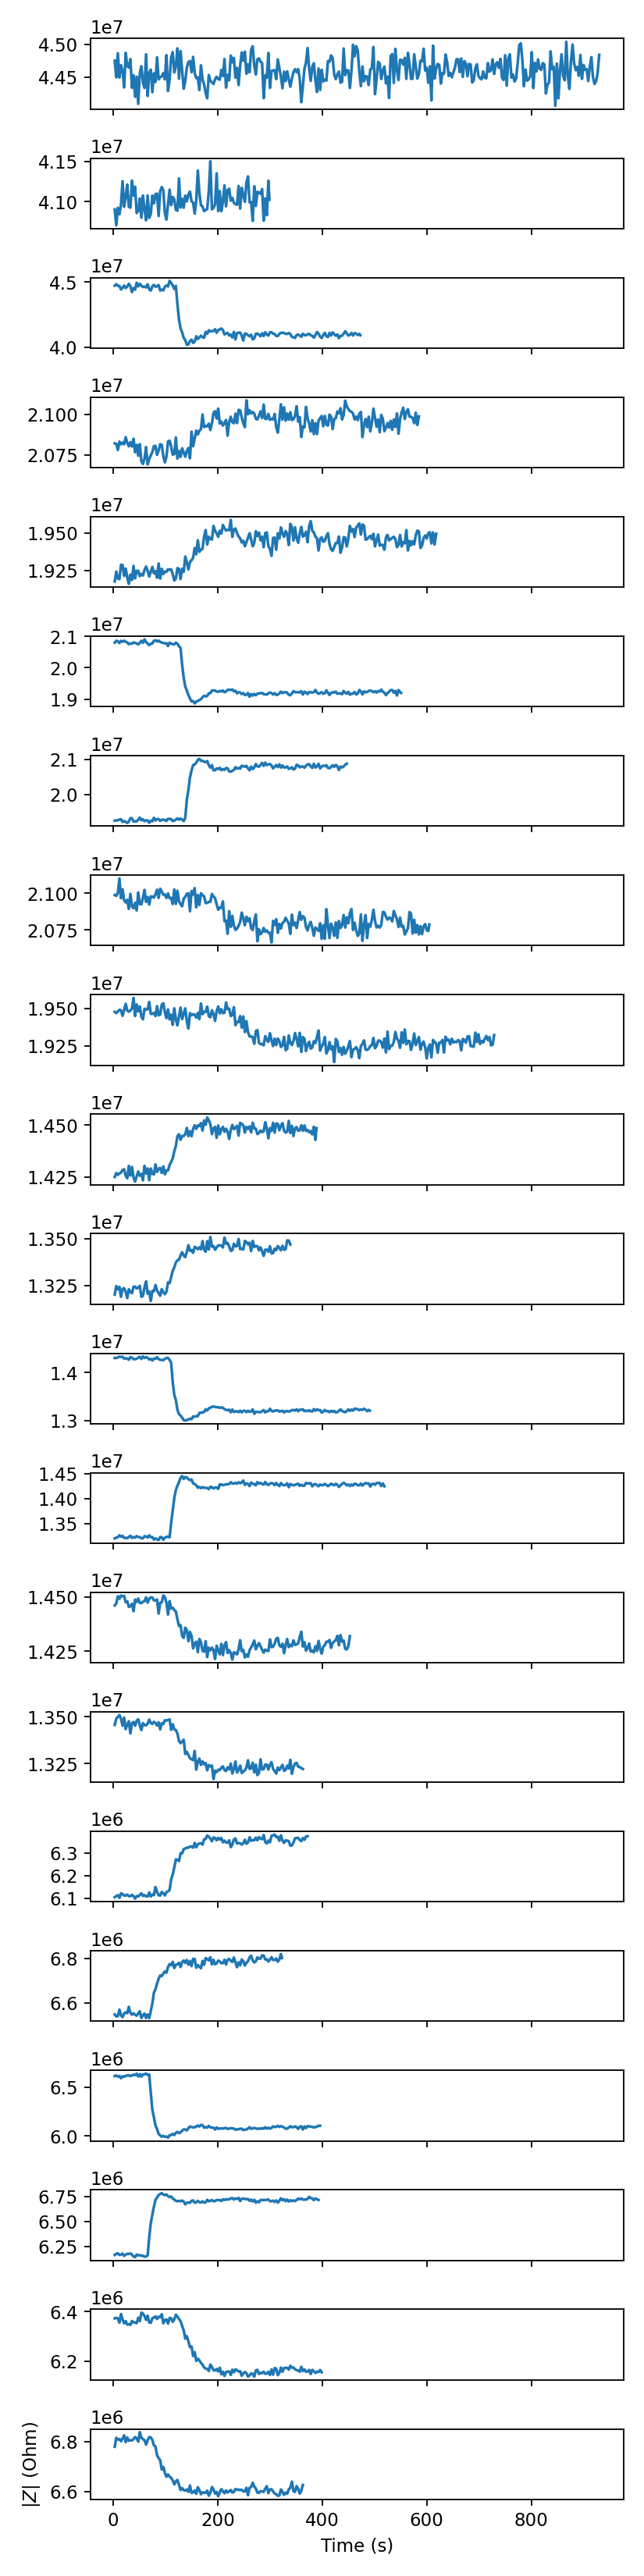

In [7]:
##### PREVIEW DATA #####
keys = (0,2) # which key from the above to plot for each dataset

print(filenames)
fig, axs = plt.subplots(len(dataframes), 1, sharex=True, figsize=(5,20))
for i in range(len(axs)):
    df = dataframes[i]
    axs[i].plot(df[df.keys()[keys[0]]], df[df.keys()[keys[1]]])
plt.xlabel("Time (s)")
plt.ylabel("$|Z|$ (Ohm)")
plt.tight_layout()
plt.show()

# for Fitting PO2 steps
This section is for fitting simple timeseries data, e.g. a single-frequency impedance measurement under an oxygen pressure change.

In [4]:
for i in range(len(dataframes)):
    fname = filenames[i]
    df = dataframes[i]
    df["Zzero"] = (df[' | Z | (Ohm)'] - np.min(df[' | Z | (Ohm)']))
    df["Znorm"] = df["Zzero"] / np.max(df["Zzero"])

# Crop and record data
tk = 'Time (s)'
zk = 'Znorm'

<IPython.core.display.Javascript object>


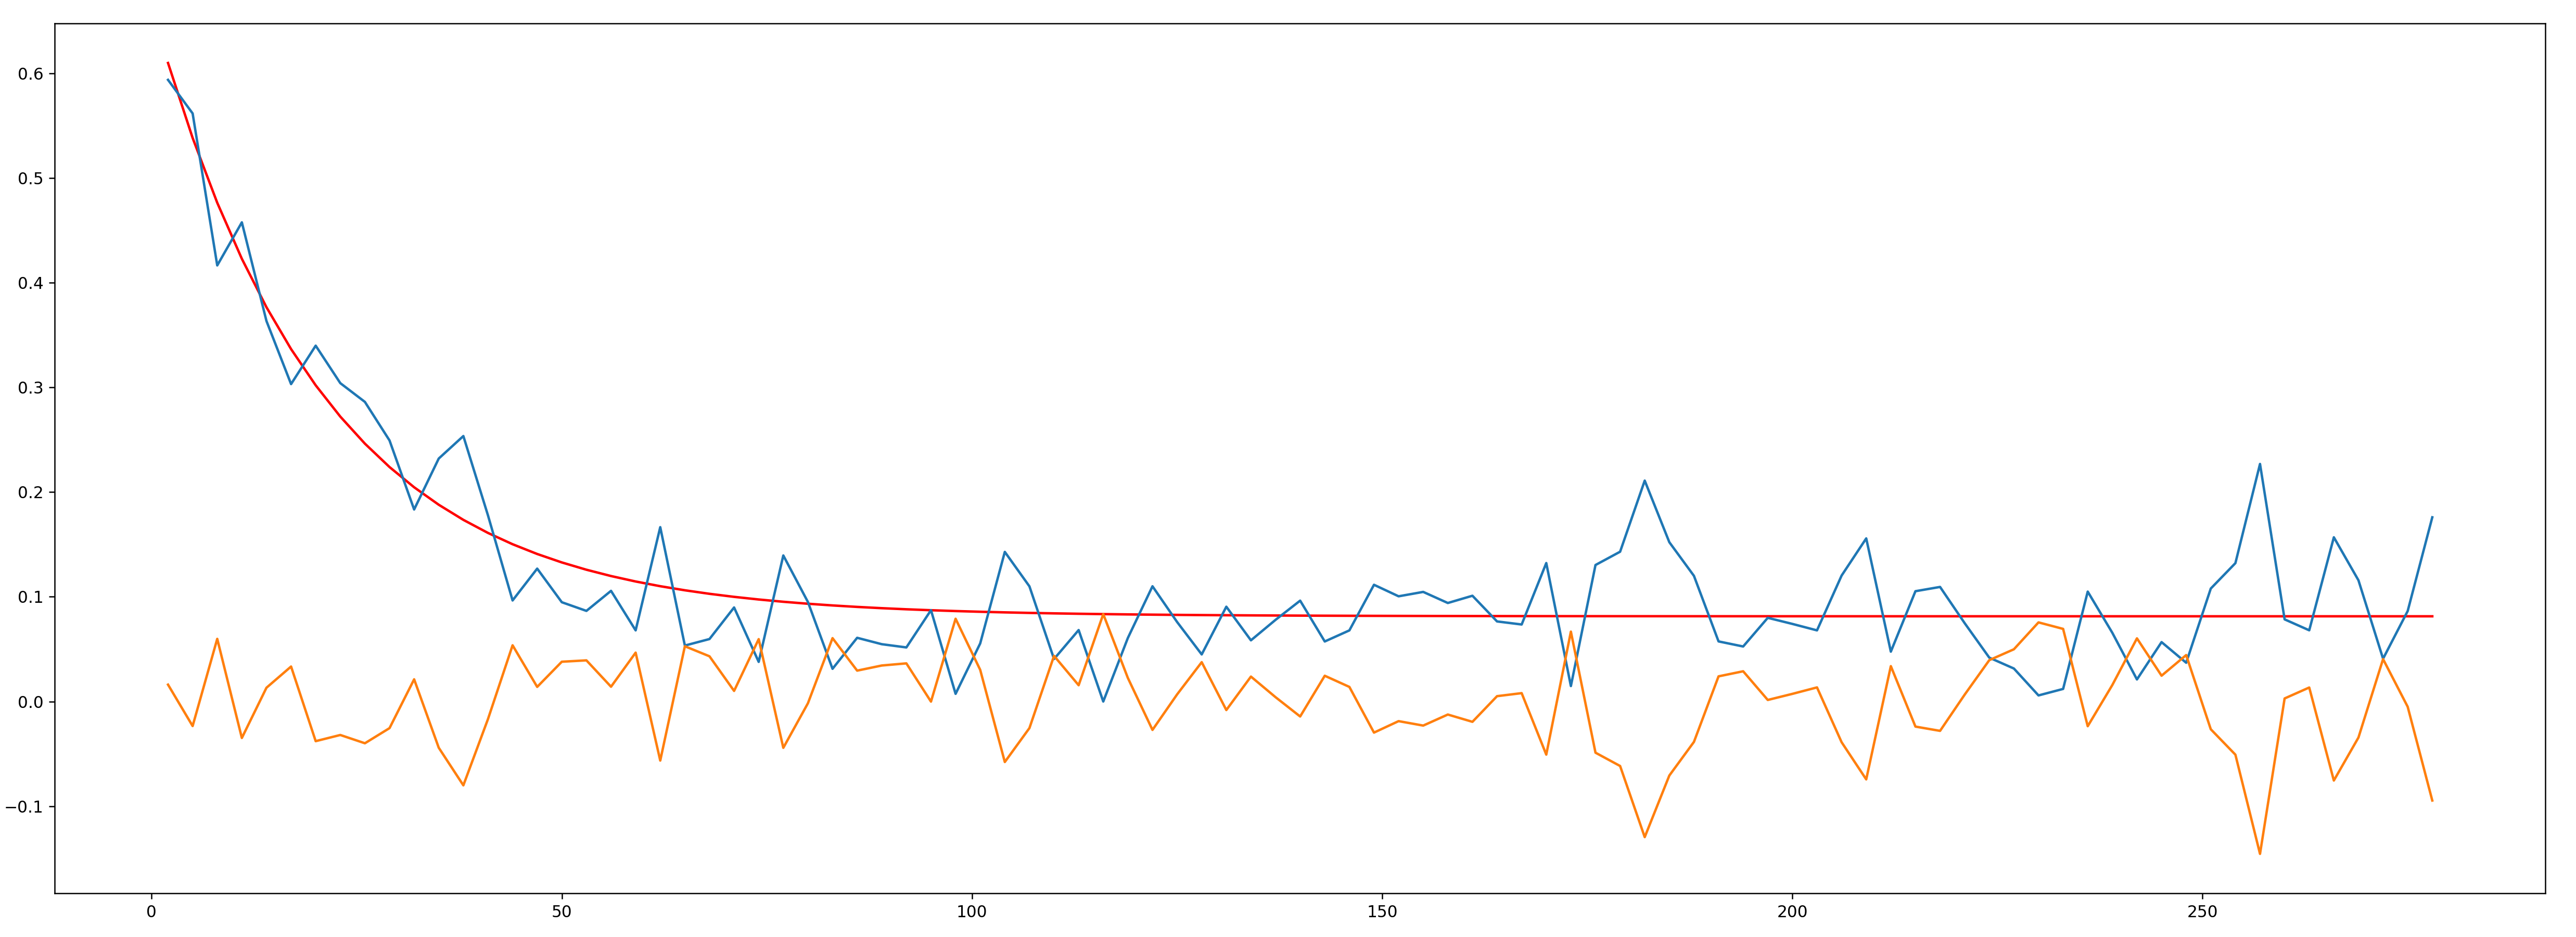

475C_0.2to0.1_200Hz_dark.csv
Temperature? (C)475
Light? (y/n)n
Start time: 80
End time: 350
ok? (y/n)y
Oxidation? (y/n)n
r0: .1
drift: 0
ok? (y/n)y
Does this fit look decent (y/n)?y
[[Model]]
    Model(reduction)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 90
    # variables        = 3
    chi-square         = 0.17170845
    reduced chi-square = 0.00197366
    Akaike info crit   = -557.559026
    Bayesian info crit = -550.059597
    R-squared          = 0.90425625
[[Variables]]
    r0:          0.04667112 +/- 0.00332682 (7.13%) (init = 0.1)
    driftslope:  0 (fixed)
    offsetX:    -7.06715995 +/- 1.32412908 (18.74%) (init = 0)
    offsetY:     0.07840883 +/- 0.00567021 (7.23%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(r0, offsetX)      = 0.825
    C(r0, offsetY)      = 0.435
    C(offsetX, offsetY) = 0.156
Are we done with this file? (y/n)n
Start time: 70
End time: 280
ok? (y/n)y
Oxidation? (y/

In [6]:
output_df = pd.DataFrame(columns=['filename', 'oxidation', 'light', 'temp C', 'rate 1/s', 'unc rate 1/s'])

results = {}

for i in range(len(dataframes)):
    fname = filenames[i]
    print(fname)
    skip = input("Skip fit? (y/n)") == "y"
    if skip:
        continue
    clear_output()
    
    fig, ax = plt.subplots(figsize=(22, 8), dpi=120)
    plt.tight_layout()
    results[fname] = []
    print(fname)
    df = dataframes[i]
    
    temperature = int(input("Temperature? (C)"))
    light = input("Light? (y/n)") == "y"

    done = False # whether we're done fitting for this file
    while not done:
        ax.clear()
        # trim data
        ax.plot(df[tk], df[zk])
        ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
        fig.canvas.draw()
        t0 = int(input("Start time: "))
        t1 = int(input("End time: "))
        line0 = ax.axvline(t0)
        line1 = ax.axvline(t1)
        fig.canvas.draw()
        ok = input("ok? (y/n)") == "y"
        if not ok:
            continue
        df["t"] = df[tk] - t0
        df_trim = df.loc[(df[tk] > t0) & (df[tk] < t1)]
        
        # hand-initialize fit parameters and model function
        ax.clear()
        ox = input("Oxidation? (y/n)") == "y"

        model_ok = False
        while not model_ok:
            r0 = float(input("r0: "))
            drift = float(input("drift: "))
            model, pars = tu.make_relax_exp_model(r0, drift, 0.0, 0.0, tu.oxidation if ox else tu.reduction)
            line, = ax.plot(df_trim["t"], model.eval(pars, x=df_trim["t"]))
            ax.plot(df_trim["t"], df_trim[zk])
            fig.canvas.draw()
            ok = input("ok? (y/n)") == "y"
            if ok:
                model_ok = True

        # attempt to fit
        try:
            res = model.fit(df_trim[zk].values, x=df_trim["t"].values, params=pars)
        except ValueError:
            print("Fitting failed. Try changing parameters.")
            continue
        ax.clear()
        ax.plot(df_trim["t"], res.eval(x=df_trim["t"]), color='r')
        ax.plot(df_trim["t"], df_trim[zk])
        ax.plot(df_trim["t"], res.residual)
        fig.canvas.draw()
        satisfied = input("Does this fit look decent (y/n)?") == "y"
        if satisfied:
            # append the result to the file's dictionary entry
            print(res.fit_report())
            results[fname].append((res, ox))
            # add the result information as a row in the output dataframe
            output_df.loc[len(output_df.index)] = [fname, ox, light, temperature, res.params["r0"].value, res.params["r0"].stderr]
            done = input("Are we done with this file? (y/n)") == "y"
        else:
            # go back and reinitialize everything
            continue
            
# perform csv export
if (input("Export csv? (y/n)") == "y"):
    output_df.to_csv(input("Filename (without .csv): ") + '.csv')

In [ ]:
h = 190e-7 # centimeters, thickness

for fname in results:
    resList = results[fname]
    for res in resList:
        r0fit = res[0].params["r0"].value
        kchem = r0fit * h
        print(f"{fname}: \nkchem = {kchem}, \noxidation = {res[1]}\n")

# for Fitting Impedance Spectra
This section is for extracting equivalent circuit parameters from EIS. See Jade's EIS_PCO10_4k notebook for explanations.

In [ ]:
results = {}
f = 'f (rad/s)'
tk = 'Time (s)'
z1k = " Z' (Ohm)"
z2k = " Z'' (Ohm)"
for df in dataframes:
    df['f (rad/s)'] = df[" Frequency (Hz)"] * 2 * np.pi

In [ ]:
output_df = pd.DataFrame(columns=['filename', 'light', 'temp C', 'R1 Ohm', 'R2 Ohm'])

for i in range(len(dataframes)):
    fname = filenames[i]
    print(fname)
    skip = input("Skip fit? (y/n)") == "y"
    if skip:
        continue
    clear_output()
    
    fig, ax = plt.subplots(figsize=(22, 8), dpi=120)
    plt.tight_layout()
    results[fname] = []
    print(fname)
    df = dataframes[i]
    
    temperature = int(input("Temperature? (C)"))
    light = input("Light? (y/n)") == "y"
    
    done = False # whether we're done fitting for this file
    while not done:
        ax.clear()
        # trim data
        ax.scatter(df[f], df[z1k])
        ax.scatter(df[f], df[z2k])
        fig.canvas.draw()
        t0 = int(input("Start time: "))
        t1 = int(input("End time: "))
        df["t"] = df[tk] - t0
        df_trim = df.loc[(df[tk] > t0) & (df[tk] < t1)]
        ax.plot(df_trim[f], df_trim[z1k])
        ax.plot(df_trim[f], df_trim[z2k])
        fig.canvas.draw()
        ok = input("ok? (y/n)") == "y"
        if not ok:
            continue
        
        # hand-initialize fit parameters and model function
        ax.clear()
        concatenated_freq = np.concatenate((df_trim[f].values, df_trim[f].values))
        concatenated_Z = np.concatenate((df_trim[z1k].values, df_trim[z2k].values))

        model_ok = False
        while not model_ok:
            R1 = float(input("R1, typ. small: "))
            R2 = float(input("R2, typ. larger: "))
            Q = float(input("Q, typ. e-12: "))
            model, pars = tu.make_impedance_model(R1, R2, Q)
            line, = ax.plot(concatenated_freq, model.eval(pars, x=df_trim[f]))
            ax.scatter(concatenated_freq, concatenated_Z)
            fig.canvas.draw()
            ok = input("ok? (y/n)") == "y"
            if ok:
                model_ok = True

        # attempt to fit
        try:
            res = model.fit(concatenated_Z, x=df_trim[f].values, params=pars)
        except ValueError:
            print("Fitting failed. Try changing parameters.")
            continue
        ax.clear()
        ax.plot(concatenated_freq, res.eval(x=df_trim[f]), color='r')
        ax.scatter(concatenated_freq, concatenated_Z)
        #ax.plot(concatenated, res.residual)
        fig.canvas.draw()
        satisfied = input("Does this fit look decent (y/n)?") == "y"
        if satisfied:
            # append the result to the file's entry
            print(res.fit_report())
            results[fname].append(res)
            # add the result information as a row in the output dataframe
            output_df.loc[len(output_df.index)] = [fname, light, temperature, res.params["R1"].value, res.params["R2"].value]
            done = input("Are we done with this file? (y/n)") == "y"
        else:
            # go back and reinitialize everything
            continue
            
# perform csv export
if (input("Export csv? (y/n)") == "y"):
    output_df.to_csv(input("Filename (without .csv): ") + '.csv')

In [ ]:
# For thin film samples, distances in cm
A = 190e-7 * 70e-1 # film thickness * effective length
l = 0.3e-1 # path length for current
sigmas = [] # conductivities

for fname in results:
    resList = results[fname]
    for res in resList:
        r1fit = res.params["R1"].value
        r2fit = res.params["R2"].value
        sig = l / (r2fit * A)
        sigmas.append(sig)
        Qfit = res.params["Q"].value
        nfit = res.params["n"].value
        print(f"{fname}: \nR1 = {r1fit}, \nR2 = {r2fit}, \nQ = {Qfit}, \nn = {nfit}, \nConductivity (1/Ohm cm) = {sig}\n")

# for Time-Dependent Impedance Spectra
This section enables plotting and fitting of data from frequency sweeps (EIS), with a focus on time-dependence (e.g. looking at degradation or at illumination changes).

# for Fitting Temperature Dependence (DEPRECATED)
This section is for making Arrhenius plots and extracting the corresponding activation energies.

DEPRECATED: I'm now using the exported CSVs in plot_data notebook, as it's much more convenient.

In [ ]:
# This is where I'm preparing CONDUCTIVITY data
# choose calibration function
cal = tu.stage_to_furnace
# enter dependent variable and temperatures

# PCO5
Y = np.array([0.00018769385143090962, 8.710417988263934e-05, 3.457789440757076e-05, 8.637250593770499e-05, 0.000118])
T = np.array([cal(475), cal(425), cal(375), cal(425), cal(475)]) + 273 
Y1 = np.array((4.298201119779019e-05, 4.432572724815368e-05, 0.00010611679082531958, 0.0001033198426882966, 0.000165407744547116, 0.00015806318337037862))
T1 = np.array((cal(375), cal(375), cal(425), cal(425), cal(475), cal(475))) + 273


# REMARKS:
"""The top are dark, the bottom are light.
On the darks, I omitted the very first measurement we took on the sample (475C, result 0.000118 1/ohm*cm), as it did not fit
the trend. However, there is no justification for this based on my experimental logs, other than not letting the sample
equilibrate for long enough (!!!!!)
The light measurements at each temperature are from the ends of the dark-to-lights and the beginnings of the light-to-darks"""

# PCO10
rho = np.array([22.363, 15.643, 15.139, 11.030, 7.343]) # Ohm-meters, manually entered from EIS_PCO10-4k
rho_cm = rho * 100
sigma_cm = (1 / rho_cm)
T0 = np.array([475, 500, 500, 525, 550]) + 273 # K

# choose model
E_guess = 1.0 # eV
modelArr, paramsArr = tu.make_conductivity_model(E_guess)

#
print("375 setpoint conductivity ratio:", 4.432572724815368e-05 / 3.457789440757076e-05)
print("425 setpoint cr:", 0.00010611679082531958 / 8.637250593770499e-05)

second_setpt375C_01-02_dark.csv: 
kchem = 9.734619157147319e-08, 
oxidation = True

second_setpt375C_01-02_dark.csv: 
kchem = 8.467864076761752e-08, 
oxidation = False

second_setpt475C_01-02_dark.csv: 
kchem = 1.4742529959625104e-07, 
oxidation = True

second_setpt475C_01-02_dark.csv: 
kchem = 1.1753207634629777e-07, 
oxidation = False

setpt375C_01-02_dark.csv: 
kchem = 1.1206499329013264e-07, 
oxidation = True

setpt375C_01-02_dark.csv: 
kchem = 8.875963276742319e-08, 
oxidation = False

setpt375C_01-02_light.csv: 
kchem = 1.5572095832462075e-07, 
oxidation = True

setpt375C_01-02_light.csv: 
kchem = 1.0938327773339685e-07, 
oxidation = False

setpt425C_01-02_dark.csv: 
kchem = 1.4539148593025223e-07, 
oxidation = True

setpt425C_01-02_dark.csv: 
kchem = 1.3733931014430625e-07, 
oxidation = False

setpt425C_01-02_light.csv: 
kchem = 2.0493168531421362e-07, 
oxidation = True

setpt425C_01-02_light.csv: 
kchem = 1.7422652268557383e-07, 
oxidation = False

setpt475C_01-02_dark.csv: 
kchem = 3.089547564435977e-07, 
oxidation = True

setpt475C_01-02_dark.csv: 
kchem = 2.6157191973107425e-07, 
oxidation = False

setpt475C_01-02_dark.csv: 
kchem = 3.287188930292869e-07, 
oxidation = True

setpt475C_01-02_dark.csv: 
kchem = 2.192368766273565e-07, 
oxidation = False

setpt475C_01-02_light.csv: 
kchem = 3.457585118538191e-07, 
oxidation = True

setpt475C_01-02_light.csv: 
kchem = 2.5687459805398104e-07, 
oxidation = False

setpt475C_01-02_light.csv: 
kchem = 3.46131647273757e-07, 
oxidation = True

setpt475C_01-02_light.csv: 
kchem = 2.5465431297069795e-07, 
oxidation = False

In [ ]:
cal = tu.stage_to_furnace
# enter dependent variable and temperatures

# PCO5
# degraded sample oxidation dark (day 2 measurements)
Y0 = np.array((9.734619157147319e-08, 1.4742529959625104e-07))
T0 = np.array(list(map(cal, [375, 475]))) + 273
# degraded sample reduction dark (day 2 measurements)
Y00 = np.array((8.467864076761752e-08, 1.1753207634629777e-07))
T00 = np.array(list(map(cal, [375, 475]))) + 273
# oxidation steps dark
Y = np.array([1.1206499329013264e-07, 1.4539148593025223e-07, 3.089547564435977e-07, 3.287188930292869e-07])
T = np.array(list(map(cal, [375, 425, 475, 475]))) + 273 
# reduction steps dark
Y1 = np.array([8.875963276742319e-08, 1.3733931014430625e-07, 2.6157191973107425e-07, 2.192368766273565e-07])
T1 = np.array(list(map(cal, [375, 425, 475, 475]))) + 273
# oxidation steps light
Y2 = np.array([1.5572095832462075e-07, 2.0493168531421362e-07, 3.457585118538191e-07, 3.46131647273757e-07])
T2 = np.array(list(map(cal, [375, 425, 475, 475]))) + 273
# reduction steps light
Y3 = np.array([1.0938327773339685e-07, 1.7422652268557383e-07, 2.5687459805398104e-07, 2.5465431297069795e-07])
T3 = np.array(list(map(cal, [375, 425, 475, 475]))) + 273

# PCO10
T10 = np.array([550, 525, 500, 500, 475]) + 273 # K
kcoxis = np.array([1.14e-7, 7.30e-8, 4.49e-8, 2.48e-8, 1.82e-8]) # cm/s
kcreds = np.array([9.04e-8, 5.40e-8, 3.45e-8, 2.04e-8, 1.78e-8]) # cm/s

# REMARKS:
"""The PCO10 data is not temperature calibrated, because it uses the Linkam stage."""
# choose model
E_guess = 1.0 # eV
modelArr, paramsArr = tu.make_conductivity_model(E_guess, temperature_correction=False)

In [ ]:
# Plot lnX against 1000/T and perform a fit according to the chosen model
fig, ax = plt.subplots(dpi=150)
# ax.scatter(0.005 + 1000/T, np.log(Y), label="dark oxidation")
# ax.scatter(0.005 + 1000/T1, np.log(Y1), label="dark reduction")
# ax.scatter(1000/T2, np.log(Y2), marker='x', label="light oxidation")
# ax.scatter(1000/T3, np.log(Y3), marker='x', label="light reduction")
# ax.scatter(1000/T0, np.log(Y0), marker='v', label="12h degraded dark oxidation")
# ax.scatter(1000/T00, np.log(Y00), marker='v', label="12h degraded dark reduction")
# ax.scatter(1000/T10, np.log(kcoxis), marker='d', label="PCO10 dark oxidation")
# ax.scatter(1000/T10, np.log(kcreds), marker='d', label="PCO10 dark reduction")

ax.scatter(T, Y, label="dark oxidation")
ax.scatter(T1, Y1, label="dark reduction")
ax.scatter(T2, Y2, marker='x', label="light oxidation")
ax.scatter(T3, Y3, marker='x', label="light reduction")
ax.scatter(T0, Y0, marker='v', label="12h degraded dark oxidation")
ax.scatter(T00, Y00, marker='v', label="12h degraded dark reduction")

# ax.scatter(1000/T, np.log(Y), label="PCO5 dark")
# ax.scatter(1000/T1, np.log(Y1), label="PCO5 light")
# ax.scatter(1000/T0, np.log(sigma_cm), label="PCO10 dark")

#ax.set_xlabel("1000/T (1/K)")
ax.set_xlabel("T (K)")
# ax.set_ylabel("ln(conductivity) (1 / (Ohm*cm))")
ax.set_ylabel("kchem (cm/s)")
ax.set_ylim(0)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
res = modelArr.fit(Y, x=T, params=paramsArr)
res.plot()
print(res.fit_report())